<a href="https://colab.research.google.com/github/disuja7/Global_terrorism_analysis/blob/main/Deeshu_Kumar_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

**Analysis points** - 
1. Trend in global terrorism - year-wise and find the possible reasons for the growth of terrorism.
2. Top 5 most crime city and country - (i) correlate city with no. of crimes/attacks .
3. Top 5 terrorist group worlwide - correlate the Group with (i) no. of people killed & wounded
(ii) no. of attacks (iii) Success
4. The most dangerous weapon/attack type - correlate weapon/attack type with no. of people killed and wounded.
5. What is the most probable Target area/type for terrorist - correlate of Target type with - (i) no. of attacks (ii) no. of people killed and wounded.
6. Pattern of attacked city and countries each year. - visualize on map.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/DATA/Global Terrorism Data.csv'
df = pd.read_csv(file_path,encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
df.info(max_cols=135)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

In [ ]:
df = df[['iyear','imonth','iday','country_txt','region_txt','city','attacktype1_txt','target1','nkill','nwound','summary','gname','targtype1_txt','weaptype1_txt','motive','success']]

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','success':'Success'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head(10)

,Year,Month,Day,Country,Region,city,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive,Success
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1
5,1970,1,1,United States,North America,Cairo,Armed Assault,Cairo Police Headquarters,0.0,0.0,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,1
6,1970,1,2,Uruguay,South America,Montevideo,Assassination,Juan Maria de Lucah/Chief of Directorate of in...,0.0,0.0,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0
7,1970,1,2,United States,North America,Oakland,Bombing/Explosion,Edes Substation,0.0,0.0,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,1
8,1970,1,2,United States,North America,Madison,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,1
9,1970,1,3,United States,North America,Madison,Facility/Infrastructure Attack,Selective Service Headquarters in Madison Wisc...,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,1


In [ ]:
df.shape

(181691, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   AttackType   181691 non-null  object 
 7   Target       181055 non-null  object 
 8   Killed       171378 non-null  float64
 9   Wounded      165380 non-null  float64
 10  Summary      115562 non-null  object 
 11  Group        181691 non-null  object 
 12  Target_type  181691 non-null  object 
 13  Weapon_type  181691 non-null  object 
 14  Motive       50561 non-null   object 
 15  Success      181691 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 22.2+ MB


In [ ]:
year_wise_attack=df['Year'].value_counts().rename_axis('Year').reset_index(name='No. of attacks')
year_wise_attack.sort_values(by='Year',inplace=True)
year_wise_attack.head()

,Year,No. of attacks
42,1970,651
46,1971,471
44,1972,568
45,1973,473
43,1974,581


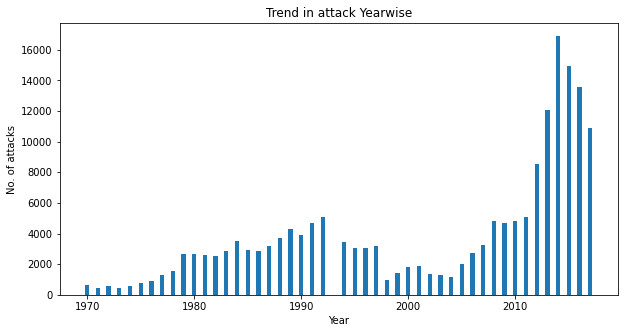

In [ ]:
import matplotlib.pyplot as plt
years = list(year_wise_attack['Year'])
attacks = list(year_wise_attack['No. of attacks'])
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(years,attacks,
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("No. of attacks")
plt.title("Trend in attack Yearwise")
plt.show()

In [ ]:
data_after_2012 = df[df['Year']>=2012]
data_after_2012['Group'].value_counts().head(10)

Unknown                                        38327
Taliban                                         5818
Islamic State of Iraq and the Levant (ISIL)     5613
Al-Shabaab                                      2963
Boko Haram                                      2266
New People's Army (NPA)                         1437
Maoists                                         1330
Kurdistan Workers' Party (PKK)                  1081
Houthi extremists (Ansar Allah)                 1048
Al-Qaida in the Arabian Peninsula (AQAP)         889
Name: Group, dtype: int64

In [ ]:
data_before_2012 = df[df['Year']<2012]
data_before_2012['Group'].value_counts().head(10)

Unknown                                             44455
Shining Path (SL)                                    4519
Farabundo Marti National Liberation Front (FMLN)     3351
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2045
Basque Fatherland and Freedom (ETA)                  2024
Taliban                                              1660
Liberation Tigers of Tamil Eelam (LTTE)              1606
Communist Party of India - Maoist (CPI-Maoist)       1421
New People's Army (NPA)                              1335
Name: Group, dtype: int64

In [ ]:
df['city'].value_counts().head(10)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

In [ ]:
data_before_2012['city'].value_counts().head(10)

Unknown         6062
Baghdad         3385
Lima            2356
Belfast         1977
Santiago        1596
San Salvador    1558
Karachi         1525
Bogota           952
Istanbul         939
Beirut           896
Name: city, dtype: int64

In [ ]:
data_after_2012['city'].value_counts().head(10)

Baghdad      4204
Unknown      3713
Mosul        1514
Karachi      1127
Mogadishu    1081
Benghazi      837
Quetta        527
Arish         521
Peshawar      479
Kabul         448
Name: city, dtype: int64

In [ ]:
city_wise_attack=df['city'].value_counts().rename_axis('City').reset_index(name='No. of attacks')
city_wise_attack.drop(index=0,inplace=True)
city_wise_attack=city_wise_attack.head(10)
city_wise_attack

,City,No. of attacks
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
5,Belfast,2171
6,Santiago,1621
7,Mogadishu,1581
8,San Salvador,1558
9,Istanbul,1048
10,Athens,1019


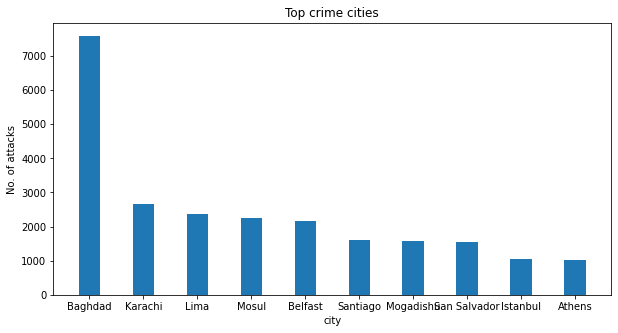

In [ ]:
city = list(city_wise_attack['City'])
attacks = list(city_wise_attack['No. of attacks'])
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(city,attacks,
        width = 0.4)
 
plt.xlabel("city")
plt.ylabel("No. of attacks")
plt.title("Top crime cities")
plt.show()

In [ ]:
terrorist_group1 = df['Group'].value_counts().rename_axis('Group').reset_index(name='No. of attacks')
terrorist_group1.head(10)


,Group,No. of attacks
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


In [ ]:
success_data =  df.groupby(by='Group')['Success'].sum().rename_axis('Group').reset_index(name='Success')
success_data.sort_values(by= 'Success', ascending = False)

,Group,Success
3408,Unknown,71748
3138,Taliban,6680
1535,Islamic State of Iraq and the Levant (ISIL),4759
2948,Shining Path (SL),4337
1120,Farabundo Marti National Liberation Front (FMLN),3317
...,...,...
976,Dainihon Yokuko Doshikai,0
977,Danish Neo-Nazi Group,0
978,Dark Harvest,0
400,Arab Liberation Army,0


In [ ]:
df['Killed']=df['Killed'].fillna(0)
df['Wounded']=df['Wounded'].fillna(0)

In [ ]:
df['Casualty'] = df['Killed']+df['Wounded']
df.head(5)

,Year,Month,Day,Country,Region,city,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive,Success,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1,1.0
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN,1,1.0
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,U.S. Embassy,0.0,0.0,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,U.S. Consulate,0.0,0.0,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1,0.0


In [ ]:
terrorist_group2 =  df.groupby(by='Group')['Casualty'].sum().rename_axis('Group').reset_index(name='Casualty')
terrorist_group2.sort_values(by='Casualty', ascending =False, inplace=True)
terrorist_group2.head(10)

,Group,Casualty
3408,Unknown,322706.0
1535,Islamic State of Iraq and the Levant (ISIL),69595.0
3138,Taliban,57342.0
704,Boko Haram,29801.0
161,Al-Qaida,28372.0
1864,Liberation Tigers of Tamil Eelam (LTTE),22020.0
177,Al-Shabaab,16954.0
3165,Tehrik-i-Taliban Pakistan (TTP),15574.0
165,Al-Qaida in Iraq,14724.0
2948,Shining Path (SL),14632.0


In [ ]:
Top_terrorist=terrorist_group1.merge(terrorist_group2,on='Group').merge(success_data,on='Group')
Top_terrorist['Success_rate'] = (Top_terrorist['Success']/Top_terrorist['No. of attacks'])*100
Top_terrorist.head(10)

,Group,No. of attacks,Casualty,Success,Success_rate
0,Unknown,82782,322706.0,71748,86.671015
1,Taliban,7478,57342.0,6680,89.328698
2,Islamic State of Iraq and the Levant (ISIL),5613,69595.0,4759,84.785320
3,Shining Path (SL),4555,14632.0,4337,95.214050
4,Farabundo Marti National Liberation Front (FMLN),3351,12130.0,3317,98.985377
5,Al-Shabaab,3288,16954.0,3016,91.727494
6,New People's Army (NPA),2772,7719.0,2457,88.636364
7,Irish Republican Army (IRA),2671,5462.0,2282,85.436166
8,Revolutionary Armed Forces of Colombia (FARC),2487,10015.0,2302,92.561319
9,Boko Haram,2418,29801.0,2247,92.928040


In [ ]:
weapons_data =  df.groupby(by='Weapon_type')['Casualty'].sum().rename_axis('Weapon_type').reset_index(name='Casualty')
weapons_data.sort_values(by= 'Casualty',ascending = False,inplace = True)
weapons_data

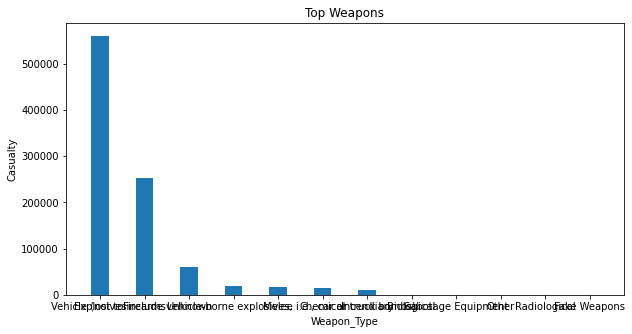

In [ ]:
weapons = list(weapons_data['Weapon_type'])
Casualty = list(weapons_data['Casualty'])
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(weapons,Casualty,
        width = 0.4)
 
plt.xlabel("Weapon_Type")
plt.ylabel("Casualty")
plt.title("Top Weapons")
plt.show()

In [ ]:
Attack_type = df['AttackType'].value_counts().rename_axis('AttackType').reset_index(name='No. of attacks')
Attack_type

,AttackType,No. of attacks
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


In [ ]:
Attack_type_data =  df.groupby(by='AttackType')['Casualty'].sum().rename_axis('AttackType').reset_index(name='Casualty')
Attack_type_data.sort_values(by= 'Casualty',ascending = False,inplace = True)
Attack_type_data

,AttackType,Casualty
2,Bombing/Explosion,530007.0
0,Armed Assault,237663.0
8,Unknown,47106.0
1,Assassination,38807.0
6,Hostage Taking (Kidnapping),30677.0
4,Hijacking,20719.0
7,Unarmed Assault,14907.0
5,Hostage Taking (Barricade Incident),8444.0
3,Facility/Infrastructure Attack,7407.0


In [ ]:
Top_attack_type=Attack_type.merge(Attack_type_data,on='AttackType')
Top_attack_type.head(10)

,AttackType,No. of attacks,Casualty
0,Bombing/Explosion,88255,530007.0
1,Armed Assault,42669,237663.0
2,Assassination,19312,38807.0
3,Hostage Taking (Kidnapping),11158,30677.0
4,Facility/Infrastructure Attack,10356,7407.0
5,Unknown,7276,47106.0
6,Unarmed Assault,1015,14907.0
7,Hostage Taking (Barricade Incident),991,8444.0
8,Hijacking,659,20719.0


In [ ]:
Target_type = df['Target'].value_counts().rename_axis('Target').reset_index(name='No. of attacks')
Target_type.head(10)

,Target,No. of attacks
0,Civilians,6461
1,Unknown,5918
2,Soldiers,3157
3,Patrol,2942
4,Checkpoint,2905
5,Vehicle,2785
6,Officers,1787
7,Village,1679
8,Military Unit,1533
9,Bus,1335


In [ ]:
Target_type_data =  df.groupby(by='Target')['Casualty'].sum().rename_axis('Target').reset_index(name='Casualty')
Target_type_data.sort_values(by= 'Casualty',ascending = False,inplace = True)
Target_type_data.head(10)

,Target,Casualty
19410,Civilians,53127.0
63974,Soldiers,22203.0
17472,Checkpoint,20064.0
44013,Market,16739.0
76741,Unknown,16442.0
78314,Village,15761.0
46330,Military Unit,12920.0
52505,Patrol,11636.0
50376,Officers,9605.0
52332,Passengers and crew members on American Airlin...,9574.0


In [ ]:
Top_target_type=Target_type.merge(Target_type_data,on='Target')
Top_target_type.head(10)

,Target,No. of attacks,Casualty
0,Civilians,6461,53127.0
1,Unknown,5918,16442.0
2,Soldiers,3157,22203.0
3,Patrol,2942,11636.0
4,Checkpoint,2905,20064.0
5,Vehicle,2785,9526.0
6,Officers,1787,9605.0
7,Village,1679,15761.0
8,Military Unit,1533,12920.0
9,Bus,1335,8218.0
